In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Dynamique de température d'une salle informatique

I) modèle de l'ordinateur

Le but de cette partie est de modéliser la chaleure dégagée par un ordinateur. On suppose ici que le pc possède une unité centrale dont on précisera les dimenssions. De plus, les composants et leurs capacités sont également choisis au préalable. L'unité centrale ainsi que tout les composants sont considéré comme en acier. Enfin on posera que les épaisseur des boitier des composants est la même pour tous et de 5*10^(-3) m

Tout d'abord, commençons par trouver les variation de températures de l'air dans l'unité centrale qui est initialement à température ambiante.
On utilisera la formule T(t) = T(composant) + (T0 - T(composant))*exp((-h*S/(m*Cp))*t) où h est le coefficient d'échange, S est la surface de contacte, m est la masse et Cp est la chaleur massique à pression constante. On supposera de plus qu'une homogénéisation de l'air se fait en 10 secondes.

In [2]:
# "a", alimentation
# "c", carte graphique
# "p", processeur
# "d", disque dur
# "r", RAM
# "cm", carte mère

Vu = 0.024276 # volume de l'unité centrale en m^3

Tamb = 291.15 # température ambiante en Kelvin

T = {"a":328.15,
     "c":333.15,
     "p":338.15,
     "d":296.15,
     "r":291.65,
     "cm":307.15} # températures des composants en K

S = {"a":0.0425,
     "c":0.0379,
     "p":0.0025,
     "d":0.0356,
     "r":0.01115,
     "cm":0.0576} # surfaces de contactes composants/air en m^2

M = {"a":3.62,
     "c":0.591,
     "p":0.023,
     "d":0.73,
     "r":0.12,
     "cm":0.56} # masses composants en Kg

C = {"a":435*M["a"],
     "c":435*M["c"],
     "p":435*M["p"],
     "d":435*M["d"],
     "r":435*M["r"],
     "cm":435*M["cm"]} # capacités calorifiques composants = masse*chaleur massique acier à pression constante en J/K

E = {"a":T["a"]*C["a"],
     "c":T["c"]*C["c"],
     "p":T["p"]*C["p"],
     "d":T["d"]*C["d"],
     "r":T["r"]*C["r"],
     "cm":T["cm"]*C["cm"]} # énergie des composants = température*capacité calorifiques en J

Mair = 1.225*(Vu-0.002412) # ro*Vair = ro*(V(unité centrale) - V(composants)) en kg

Cpair = 1005 # chaleur massique de l'air à pression constante en J/(kg*K)

Tf = (T["a"]+T["c"]+T["p"]+T["d"]+T["r"]+T["cm"])/len(T) # température finale de l'air dans l'unité centrale en K

tmax = 10

In [3]:
Tf

315.73333333333335

In [4]:
def temp_air(T, S, Tamb, Mair, Cpair, t):
    """
    dict[str:Number]^2*Number^4*int -> Number
    rend la température de l'air de l'unité centrale à un instant t
    """
    if t == 0 :
        return Tamb
    else :
        T0 = Tamb
        h = {"a":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["a"]*math.fabs(T0-T["a"])),
         "c":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["c"]*math.fabs(T0-T["c"])),
         "p":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["p"]*math.fabs(T0-T["p"])),
         "d":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["d"]*math.fabs(T0-T["d"])),
         "r":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["r"]*math.fabs(T0-T["r"])),
         "cm":(math.fabs(Tf-Tamb)*Cpair*Mair)/(S["cm"]*math.fabs(T0-T["cm"]))}
        s = 0
        for i in range(1,t+1) :
            for j in T :
                s += math.exp((-h[j]*S[j]*i)/(Mair*Cpair))*(Tamb-T[j])+T[j]
                h[j] = (math.fabs(Tf-Tamb)*Cpair*Mair)/(S[j]*math.fabs(T0-T[j]))
            T0 = s/len(S)
            s = 0
        return T0

In [5]:
temp_air(T, S, Tamb, Mair, Cpair,3)

313.9005716092588

In [6]:
def temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax) :
    """
    dict[str:Number]^2*Number^5 -> Number
    rend la température de l'air de l'unité centrale pour tout instant t
    """
    TT = [(0,Tamb)]
    for i in range(1,tmax+1) :
        TT.append((i,temp_air(T, S, Tamb, Mair, Cpair, i)))
    return TT

In [7]:
temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax)

[(0, 291.15),
 (1, 303.43890807353995),
 (2, 309.0539229993666),
 (3, 313.9005716092588),
 (4, 315.3117900062259),
 (5, 315.67000528281966),
 (6, 315.7186572807696),
 (7, 315.7290570430276),
 (8, 315.73196505174343),
 (9, 315.7328872292646),
 (10, 315.7331867365778)]

In [8]:
def list_temps(T, S, Tamb, Mair, Cpair, tmax):
    """
    """
    L = []
    for i in temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax) :
        a,b = i
        L.append(a)
    return L

def list_T(T, S, Tamb, Mair, Cpair, tmax):
    """
    """
    L = []
    for i in temp_air_tout_instant(T, S, Tamb, Mair, Cpair, tmax) :
        a,b = i
        L.append(b)
    return L
L1 = list_temps(T, S, Tamb, Mair, Cpair, tmax)
L2 = list_T(T, S, Tamb, Mair, Cpair, tmax)

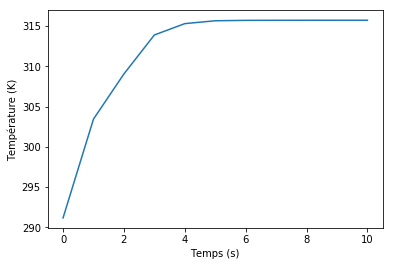

In [9]:
def plot_Temp(L1,L2):
    '''
    rend la courbe de l'évolution de la température au cours du temps
    '''
    plt.figure()
    plt.plot(L1,L2)
    plt.ylabel("Température (K)")
    plt.xlabel("Temps (s)")
    plt.show()
    return

plot_Temp(L1,L2)

On remarque qu'avec les valeurs de températures qui montre une utilisation assez poussé de l'ordinateur, la température de l'air a l'intérieur de celui-ci croit très rapidement.

A présent, on va faire évoluer le modèle en posant que le pc vient de s'allumer et que la température des composants évolue au cours du temps. pour celà on utilise un modèle vu en physique au S1 où l'on étudie la température d'un processeur lorsqu'il est refroidi ou non. On peut alors appliquer ce modèle aux autres composants qui chauffent car ils fonctionnent de la même manière. Pour celà nous aurons besoin de la puissance apporté a chaque composants (P), de la température fournie par le ventilateur que l'on supose constante et égale à 291.15 K, de la resistence thermique (R) du dissipateur qui est supposé le même pour tout les composants, ainsi que de la capacité calorifique du processeur c'est à dire de l'acier, puisque les composants sont posé comme étant en acier.

In [21]:
# "a", alimentation
# "c", carte graphique
# "p", processeur
# "d", disque dur
# "r", RAM
# "cm", carte mère
 
Vu = 0.024 # volume de l'unité centrale en m^3

Vair = Vu - 0.002412 # volume air = volume unité centrale - volume composants

Tamb = 291.15 # température ambiante en Kelvin

Ralu = 0.5 # résistence thermique de l'aluminium en Watt/(mètre*Kelvin)

Rair = 

Cpalu = 897 # chaleur massique de l'aluminium à pression constante en J/(kg*K)

Tfalu = {"p":math.exp(-((60/C["p"])+(Tvent/(R*C["p"])))*90)*(Tamb-60*R-Tvent)+60*R+Tvent,
        "a":math.exp(-((100/C["a"])+(Tvent/(R*C["a"])))*90)*(Tamb-100*R-Tvent)+100*R+Tvent,
        "c":math.exp(-((95/C["c"])+(Tvent/(R*C["c"])))*90)*(Tamb-95*R-Tvent)+95*R+Tvent}

Malu = {"p":0.15,
        "a":0.13,
        "c":0.084} # masse des dissipateur en kg

Mvent = {"p":1.225*7.41*10**(-3),
        "a":1.225*9.91*10**(-3),
        "c":1.225*8.64*10**(-3)} # masse de l'air brassé par les ventilateurs en kg

Scom_pair = {"a":0.0425,
     "c":0.0379,
     "d":0.0356,
     "r":0.01115,
     "cm":0.0576} # surfaces de contactes composants/air en m^2

Scomp_dis = {"p":0.0025,
            "a":0.00345,
            "c":0.0048} # surfaces de contactes composants/dissipateurs en m^2

Sdis_vent = {"p":0.04005,
            "a":0.2763,
            "c":0.03936} # surfaces de contactes dissipateurs/air en m^2

M = {"a":3.62,
     "c":0.591,
     "p":0.023,
     "d":0.73,
     "r":0.12,
     "cm":0.56} # masses composants en Kg

C = {"a":435*M["a"],
     "c":435*M["c"],
     "p":435*M["p"],
     "d":435*M["d"],
     "r":435*M["r"],
     "cm":435*M["cm"]} # capacités calorifiques composants = masse*chaleur massique acier à pression constante en J/K

Mair = 1.225*(Vu-0.002412) # ro*Vair = ro*(V(unité centrale) - V(composants)) en kg

Cpair = 1005 # chaleur massique de l'air à pression constante en J/(kg*K)

tmax = 100 # temps en s

In [22]:
Tfalu

{'p': 321.15, 'a': 341.15, 'c': 338.65}

In [26]:
def temp_comp_dis(Scomp_dis, Sdis_vent, Mvent, Malu, Tfalu, C, Ralu, Rair, Tvent, Tamb, Cpalu, t) :
    
    P = {"a":np.random.randint(80, 100 + 1),
     "c":np.random.randint(75, 95 + 1),
     "p":np.random.randint(45, 60 + 1),
     "d":np.random.randint(8, 15 + 1),
     "r":1,
     "cm":np.random.randint(20, 35 + 1)} # puissance apportés aux composants en W
    
    if t == 0 :
        return ({"a":Tamb,
     "c":Tamb,
     "p":Tamb,
     "d":Tamb,
     "r":Tamb,
     "cm":Tamb}, {"p":Tamb,
            "a":Tamb,
            "c":Tamb})
    else :
        Keys = ["d", "r", "cm"]
        
        Vair = Tamb
        
        hcomp_dis = {"p":0,
            "a":0,
            "c":0}
        
        Tdis = {"p":Tamb,
            "a":Tamb,
            "c":Tamb}
        
        Tcomp = {"a":Tamb,
     "c":Tamb,
     "p":Tamb,
     "d":Tamb,
     "r":Tamb,
     "cm":Tamb}
        
        Tvent = {"p":Tamb,
            "a":Tamb,
            "c":Tamb}
        
        hdis_vent = {"p":0,
            "a":0,
            "c":0}
        
        for i in range(1,t+1) :
            for j in Keys :
                Tcomp[j] = math.exp(-((P[j]/C[j])+(Tair/(Rair*C[j])))*i)*(-P[j]*Rair)+P[j]*Rair+Tair
            for k in Scomp_dis :
                if Tdis[k] != Tcomp[k] or Tdis[k] == Tcomp[k] == Tamb :
                    Tcomp[k] = math.exp(-((P[k]/C[k])+(Tvent[k]/(Ralu*C[k])))*i)*(-P[k]*Ralu)+P[k]*Ralu+Tvent[k]
                    
                    hcomp_dis[k] = (math.fabs(Tfalu[k]-Tamb)*Cpalu*Malu[k])/(Scomp_dis[k]*math.fabs(Tdis[k]-Tcomp[k]))
                    
                    Tdis[k] = math.exp((-hcomp_dis[k]*Scomp_dis[k]*i)/(Malu[k]*Cpalu))*(Tamb-Tcomp[k])+Tcomp[k]
                    
                    hdis_vent[k] = (math.fabs(Tfalu[k]-Tamb)*Cpair*Mvent[k])/(Sdis_vent[k]*math.fabs(Tvent[k]-Tdis[k]))
                    
                    Tvent[k] = math.exp((-hdis_vent[k]*Sdis_vent[k]*i)/(Mvent[k]*Cpair))*(Tamb-Tdis[k])+Tdis[k]
                else :
                    for k in Scomp_dis :
                        
                        Tcomp[k] = (P[k]/C[k])*i+Tfalu[k]
                        
                        Tdis[k] = Tcomp[k]
                        
                        Tvent[k] = Tdis[k]
            
            Tair = ((Vair-7.41*10**(-3)-9.91*10**(-3)-8.64*10**(-3))*temp_air(Tcomp, Scomp_air, Tamb, Mair, Cpair, i)+7.41*10**(-3)*Tvent["p"]+9.91*10**(-3)*Tvent["a"]+8.64*10**(-3)*Tvent["c"])/Vair
            
    return (Tcomp, Tdis, Tvent)

In [30]:
temp_comp_dis(Scomp_dis, Sdis_vent, Mvent, Malu, Tfalu, C, R, Tvent, Tamb, Cpalu, 200)

({'a': 352.83476535213055,
  'c': 403.99803664157764,
  'p': 1220.7002248875565,
  'd': 297.4482207526374,
  'r': 294.98141762452104,
  'cm': 310.85443349753695},
 {'p': 1220.7002248875565, 'a': 352.83476535213055, 'c': 403.99803664157764},
 {'p': 1220.7002248875565, 'a': 352.83476535213055, 'c': 403.99803664157764})

La courbe bleu correspond à l'alimentation,
La jaune à la carte graphique,
La verte au processeur,
La marron à la carte mère,
La rouge au disque dur,
La violette au barette de RAM

In [44]:
Tf = (temp_comp(C, R, Tvent, Tamb, tmax)["a"]+temp_comp(C, R, Tvent, Tamb, tmax)["c"]+temp_comp(C, R, Tvent, Tamb, tmax)["p"]+temp_comp(C, R, Tvent, Tamb, tmax)["d"]+temp_comp(C, R, Tvent, Tamb, tmax)["r"]+temp_comp(C, R, Tvent, Tamb, tmax)["cm"])/len(temp_comp(C, R, Tvent, Tamb, tmax)) # température finale de l'air dans l'unité centrale en K

In [45]:
def temp_air_variable(S, C, R, Mair, Cpair, Tvent, Tamb, t):
    """
    dict[str:Number]^2*Number^6 -> Number
    rend la valeur de température de l'air à un instant t
    """
    return temp_air(temp_comp(C, R, Tvent, Tamb, t), S, Tamb, Mair, Cpair, t)

In [46]:
temp_air_variable(S, C, R, Mair, Cpair, Tvent, Tamb, 3600)

313.81666666666666

In [47]:
def temp_air_variable_tout_instant(S, C, R, Mair, Cpair, Tvent, Tamb, tmax) :
    """
    dict[str:Number]^2*Number^6 -> Number
    rend la valeur de température de l'air à tout instant t
    """
    TT = [(0,Tamb)]
    for i in range(1,tmax+1) :
        TT.append((i,temp_air_variable(S, C, R, Mair, Cpair, Tvent, Tamb, i)))
    return TT

In [48]:
def list_temps3(S, C, R, Mair, Cpair, Tvent, Tamb, tmax):
    """
    """
    L = []
    for i in temp_air_variable_tout_instant(S, C, R, Mair, Cpair, Tvent, Tamb, tmax) :
        a,b = i
        L.append(a)
    return L

def list_T3(S, C, R, Mair, Cpair, Tvent, Tamb, tmax):
    """
    """
    L = []
    for i in temp_air_variable_tout_instant(S, C, R, Mair, Cpair, Tvent, Tamb, tmax) :
        a,b = i
        L.append(b)
    return L
L1 = list_temps3(S, C, R, Mair, Cpair, Tvent, Tamb, tmax)
L2 = list_T3(S, C, R, Mair, Cpair, Tvent, Tamb, tmax)

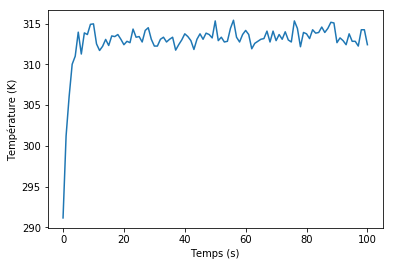

In [49]:
def plot_Temp_variable(L1,L2):
    '''
    rend la courbe de l'évolution de la température au cours du temps
    '''
    plt.figure()
    plt.plot(L1,L2)
    plt.ylabel("Température (K)")
    plt.xlabel("Temps (s)")
    plt.show()
    return

plot_Temp(L1,L2)

On remarque que si les températures des composants sont variables, la température de l'air à l'intérieur de l'unité centrale fluctue également. Cependant, l'air reste quand même chaud soit environ d'une moyenne de 40°C, c'est pourquoi il va falloir encore faire évoluer le modèle, cette fois ci en refroidissant l'air à l'aide de ventilateur.

le principe de ventilation de l'air d'un pc est d'expulser une quantité de l'air chaud à l'aide d'un ventilateur et de faire entrer de l'air extérieur à température ambiante. 

In [50]:
Vair = Vu - 0.002412 # volume air = volume unité centrale - volume composants
Vair

0.021588

On supposera que le débit d'air est constant au cours du temps.

In [51]:
Dvent = 0.01747 # débit d'air explusé de lordinateur en m^3/s

In [52]:
def temp_air_vent(S, C, R, Mair, Cpair, Tvent, Tamb, t, Vair, Pvent, Ctair, Vu) :
    """
    dict[str:Number]^2*Number^10 -> Number
    rend la valeur de température de l'air à un instant t
    """
    return (temp_air_variable(S, C, R, Mair, Cpair, Tvent, Tamb, t)*(Vair-Dvent)+Tamb*Dvent)/Vair

In [53]:
temp_air_vent(S, C, R, Mair, Cpair, Tvent, Tamb, 10, Vair, Pvent, Ctair, Vu)

295.1207353710097